In [1]:
import pandas as pd
from collections import Counter
from langdetect import detect
import langdetect
import numpy as np
import importlib
import os
current_dir = os.getcwd()
%cd ..
import textmining.text_miner 
import textmining.loader  as loader
import textmining.topic_modeler as tm
import textmining.significance_testing as significance_testing
import textmining.utility as utility
import textmining.analysis as analysis
import textmining.cluster_analysis as cluster_analysis
import textmining.machine_learning as machine_learning
import textmining.news_editorials_experiments as experiment
import textmining.cross_models_significance as cross

importlib.reload(textmining.machine_learning)
importlib.reload(textmining.news_editorials_experiments)
importlib.reload(textmining.cross_models_significance)
importlib.reload(textmining.cluster_analysis)
importlib.reload(textmining.text_miner)

importlib.reload(textmining.text_miner)
importlib.reload(textmining.topic_modeler)
importlib.reload(textmining.analysis)
importlib.reload(textmining.loader)
os.chdir(current_dir)

%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

C:\Users\elba_ro\Documents\projects\nlpcss2020-editorials-analysis


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\elba_ro\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
load = loader.loader()

"corpus" is set. It contains the 6000 annotation


# Clustering Personalities

In [3]:
personality_df = load.load_personality_traits()
personality_df.head()

,id,extraversion_num,agreeableness_num,conscientiousness_num,neuroticism_num,openness_num,extraversion,agreeableness,conscientiousness,neuroticism,openness
0,L01,29,95,33,32,98,LOW,HIGH,AVERAGE,LOW,HIGH
1,L03,52,29,10,75,91,AVERAGE,LOW,LOW,LOW,HIGH
2,L07,11,31,61,69,29,LOW,LOW,AVERAGE,HIGH,LOW
3,C03,29,31,15,99,40,LOW,LOW,LOW,HIGH,AVERAGE
4,C09,89,77,53,30,94,HIGH,HIGH,AVERAGE,LOW,HIGH


In [4]:
personality_df['personality'] = personality_df.extraversion + personality_df.agreeableness  +  personality_df.conscientiousness +  personality_df.neuroticism  +  personality_df.openness
personality_df['personality'] = personality_df.extraversion + personality_df.openness

In [5]:
personality_df.set_index('id', inplace=True)

C:\Users\elba_ro\Documents\projects\nlpcss2020-editorials-analysis\textmining\cluster_analysis.py:21: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (21). Possibly due to duplicate points in X.
  for i in k_range]
C:\Users\elba_ro\Documents\projects\nlpcss2020-editorials-analysis\textmining\cluster_analysis.py:21: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (22). Possibly due to duplicate points in X.
  for i in k_range]
C:\Users\elba_ro\Documents\projects\nlpcss2020-editorials-analysis\textmining\cluster_analysis.py:21: ConvergenceWarning: Number of distinct clusters (20) found smaller than n_clusters (23). Possibly due to duplicate points in X.
  for i in k_range]


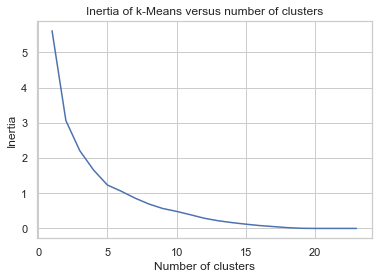

k_optimal:  5
cosine_kmeans - silhouette_score: 0.58516251268326
1.0.0
Plotting for:
5
5


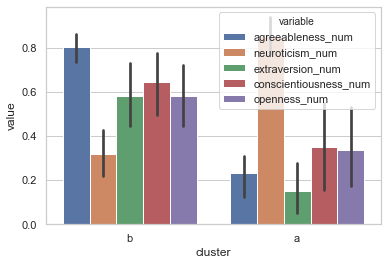

,Variable,Var
1,agreeableness_num,0.284907
3,neuroticism_num,0.267538
0,extraversion_num,0.217105
2,conscientiousness_num,0.146585
4,openness_num,0.122059


In [6]:
pers_cols = [x for x in personality_df.columns.values if x.endswith('_num') or x.endswith('extraversion_num')]
df = personality_df[pers_cols].copy()
k_optimal =  cluster_analysis.elbow(df, normalize=True, k_range= range(1, 24))
print('k_optimal: ', k_optimal)
k_optimal = 2
analyzer_coskmeans = cluster_analysis.Analyzer(df)
analyzer_coskmeans.set_algorithm(algorithm= 'cosine_kmeans', algorithm_args={'n_clusters':k_optimal})
analyzer_coskmeans.evaluate_silhouette_score(metric="cosine")

predicted_df = analyzer_coskmeans.predict_labels('id', apply=True)
print('Plotting for:')
most_variant, plot_data = analyzer_coskmeans.top_vars('id', top=5, plot=True)
most_variant

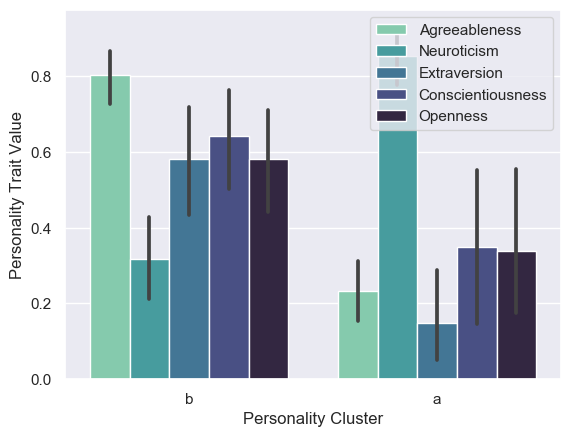

In [7]:
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

sns.reset_defaults()
sns.set(
    #rc={'figure.figsize':(6,5)}, 
    #style="white" # nicer layout
)

sns.barplot(x='cluster', y='value', hue='variable', data=plot_data, palette=sns.color_palette("mako_r", 5))
plt.xlabel('Personality Cluster')
plt.ylabel('Personality Trait Value')
#plt.xticks(np.arange(2), ['Agreeable', 'Non-Agreeable'])
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend(handles, ['Agreeableness', 'Neuroticism', 'Extraversion', 'Conscientiousness', 'Openness'])
plt.show()
#plt.savefig("personaity-clusters.pdf")

In [ ]:
len(personality_df)

In [ ]:
predicted_df.cluster.value_counts()

In [ ]:
predicted_df.head()


# Analysis

In [ ]:

corpus = load.corpus
corpus = load.add_personality_label(predicted_df)

corpus.columns.values
len(corpus)

In [ ]:
corpus.personality.value_counts(), corpus.political_pole.value_counts() 

In [ ]:
pd.crosstab(corpus.personality, corpus.effect_abstracted), print(''),print(''), pd.crosstab(corpus.personality, corpus.effect)

In [ ]:
intesity_maj_df = load.get_article_dfs_per_ideology(ideology = 'personality', include_content = True)

In [ ]:
a_df = intesity_maj_df['a']
b_df = intesity_maj_df['b']

In [ ]:
a_df.columns.values

In [ ]:
print(a_df.a_majority.value_counts())



print(b_df.majority.value_counts())



In [ ]:
print(a_df.split_label.value_counts())
print()
print(b_df.split_label.value_counts())
print()
print()
print(pd.crosstab(a_df.personality_a_majority, a_df.split_label))
print()
print(pd.crosstab(b_df.personality_b_majority, b_df.split_label))

In [ ]:
a_df.rename(columns = {'majority': 'personality_a_majority'}, inplace = True)
b_df.rename(columns = {'majority': 'personality_b_majority'}, inplace = True)

In [ ]:
data = pd.read_json('../data/articles_with_adu_liwc_lexicons_content.json', orient='records')
data.set_index('idx', inplace=True)
print(len(data))
data = data.merge(a_df[['personality_a_majority']], how="inner",left_index=True, right_index=True )
data = data.merge(b_df[['personality_b_majority']], how="inner",left_index=True, right_index=True )
data.drop(['liberal_majority', 'conservative_majority'], axis=1, inplace=True)


In [ ]:
data.drop(['liberal_majority', 'conservative_majority'], axis=1, inplace=True)
#data.to_csv('../data/personality_all_features.csv')

# Experiment 2

In [16]:
def get-
editorials_topics_df = pd.read_csv('../out/editorials_topic_w_group.csv').set_index('idx')
editorials_topics_df.head()
editorials_topics_df.topic_group.unique(), len(editorials_topics_df.dominant_topic.unique()), editorials_topics_df.topic_group.value_counts()

(array(['state', 'national', 'global'], dtype=object), 18, national    475
 state       277
 global      227
 Name: topic_group, dtype: int64)

In [18]:
data = pd.read_csv('../data/personality_all_features.csv')
data.set_index('idx', inplace=True)
data = data.join(editorials_topics_df, how='inner')

data.topic_group.unique(), len(data.dominant_topic.unique()), data.topic_group.value_counts()

(array(['state', 'national', 'global'], dtype=object), 18, national    475
 state       277
 global      227
 Name: topic_group, dtype: int64)

In [19]:
training_df, test_df = analysis.get_train_test(data)

In [28]:
training_df.head()

,adu_anecdote,adu_other,adu_statistics,adu_testimony,content,ids,mpqa_arg_assessments,mpqa_arg_authority,mpqa_arg_causation,mpqa_arg_conditionals,...,lemma3_world trade organ,lemma3_year presid bush,lemma3_york public research,lemma3_york state budget,lemma3_york state capitol,lemma3_york state legislatur,personality_a_majority,personality_b_majority,topic_group,dominant_topic
idx,,,,,,,,,,,,,,,,,,,,,
1677322,12,11,0,1,A State Supreme Court judge yesterday removed ...,1677322,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,challenging,reinforcing,state,12.0
1818732,7,8,0,0,A battle between Yonkers and its neighbors ove...,1818732,0,0,2,1,...,0.0,0.0,0.0,0.0,0.0,0.0,no_effect,no_effect,state,11.0
1680635,9,4,0,0,"A bipartisan, Congressionally mandated task fo...",1680635,0,0,1,0,...,0.0,0.0,0.0,0.0,0.0,0.0,no_effect,reinforcing,global,0.0
1647477,10,6,0,4,A commission investigating the United Nations'...,1647477,0,1,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,no_effect,reinforcing,global,0.0
1785853,7,13,3,3,A federal study showing that fourth graders in...,1785853,0,0,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,challenging,reinforcing,state,9.0


In [38]:
pd.crosstab(training_df['topic_group'], training_df['personality_a_majority'] )
pd.crosstab(training_df['topic_group'], training_df['personality_b_majority'] )

personality_b_majority,challenging,no_effect,reinforcing
topic_group,,,
global,17,36,145
national,37,46,281
state,20,39,162


In [20]:
training_df.topic_group.unique(), len(training_df.dominant_topic.unique()), training_df.topic_group.value_counts()

(array(['state', 'global', 'national'], dtype=object), 18, national    364
 state       221
 global      198
 Name: topic_group, dtype: int64)

In [46]:
A_ = [1,2,3]
A_.remove(1)
A_

[2, 3]

In [47]:
from pathlib import Path
def analyze_sign(df_orig, profiles, p_value_threshold = 0.05,info='', save=True):
    groups = df_orig.topic_group.unique().tolist() + ['all']
    for g in groups:
        for profile in profiles:
            result = {}
            result['group'] = g
            result['profile'] = profile
            
            
            print("Analyzing ",  g, 'for ', profile)
            
            if g is not 'all':
                df = df_orig.copy()
                df = df[df['topic_group'] == g]
            
            numeric_features_list = list(df.select_dtypes(include=[np.number]))
            numeric_features_list.remove('dominant_topic')
            lemmas = [x for x in numeric_features_list if x.startswith('lemma')]
            for lemma in lemmas:
                numeric_features_list.remove(lemma)
            
            result['significance'] = significance_testing.significance(df, features = numeric_features_list, 
                                               save = True, desc='../out/significance/{}_{}_train_{}'.format(
                                               g, profile, info), 
                                               independent_var=profile,
                                               p_value_threshold = p_value_threshold)
            
            Path('../out/heatmaps/personality_group').mkdir(parents=True, exist_ok=True)

            effectsize_filtered = analysis.get_sign_features_hm(result['significance'] )
            analysis.plot_hm(effectsize_filtered,  filename='personality_group/heatmap_{}_{}_train_{}.pdf'.format(
                                               g, profile, info) )
        

Analyzing  state for  personality_a_majority
data has 221 instances
bonforrini_threshold:  0.016666666666666666
mpqa_arg_doubt
INNER EXCEPTION All numbers are identical in mannwhitneyu
exception for feature  All numbers are identical in kruskal
exception for feature  All numbers are identical in kruskal
exception for feature  All numbers are identical in kruskal
Analyzing  state for  personality_b_majority
data has 221 instances
bonforrini_threshold:  0.016666666666666666
exception for feature  All numbers are identical in kruskal
exception for feature  All numbers are identical in kruskal
mpqa_arg_wants
INNER EXCEPTION All numbers are identical in mannwhitneyu
exception for feature  invalid value encountered in greater
liwc_scores_categories_Exclam
INNER EXCEPTION All numbers are identical in mannwhitneyu
exception for feature  All numbers are identical in kruskal
Analyzing  global for  personality_a_majority
data has 198 instances
bonforrini_threshold:  0.016666666666666666
exception

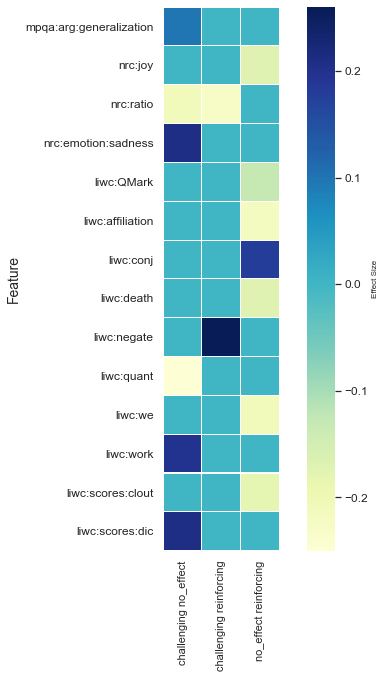

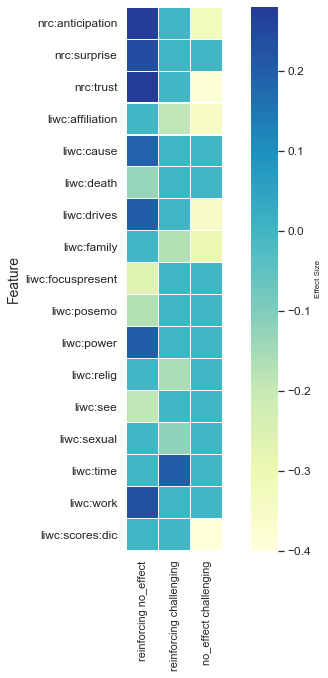

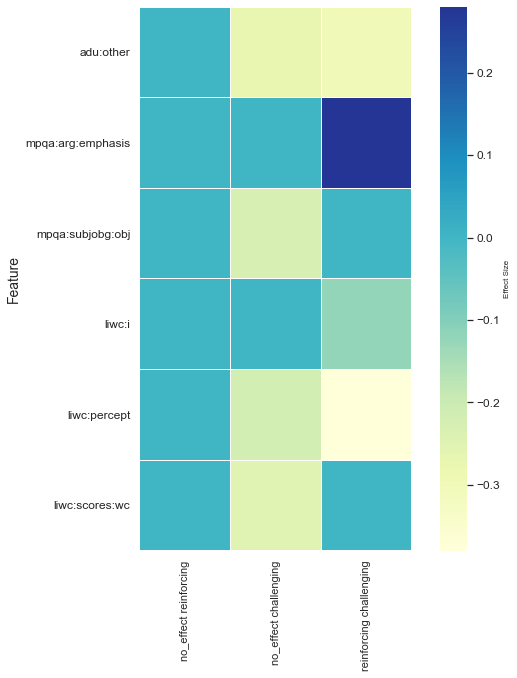

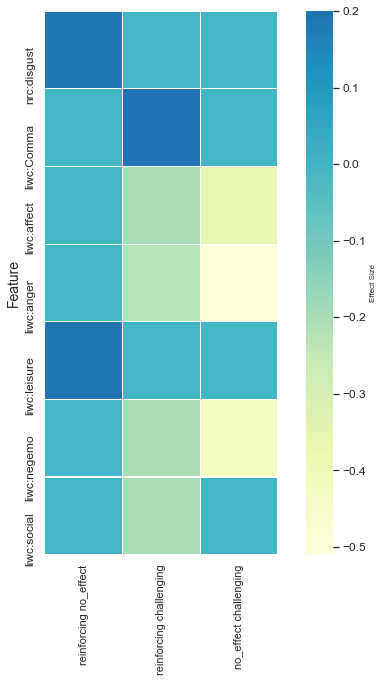

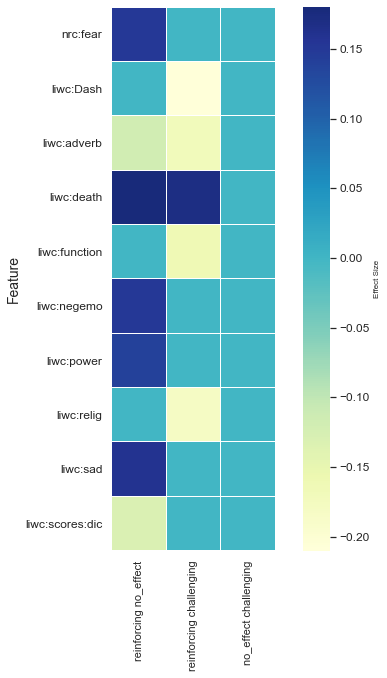

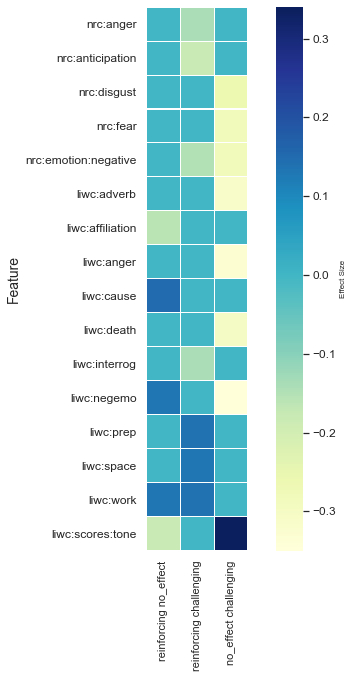

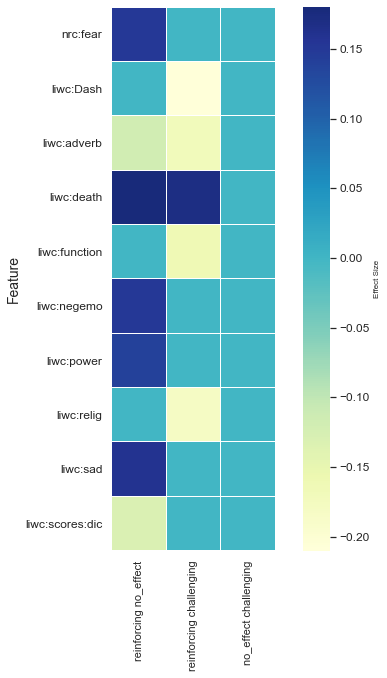

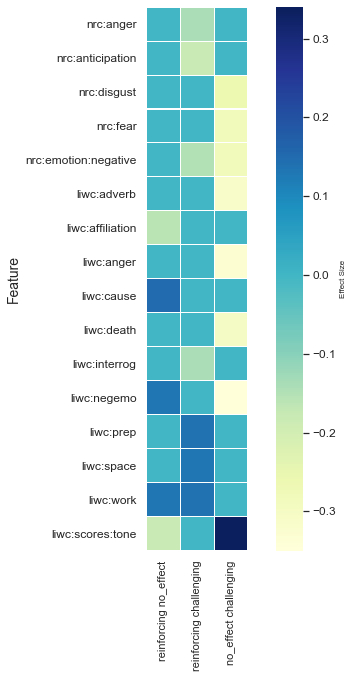

In [49]:
analyze_sign(training_df, ['personality_a_majority', 'personality_b_majority'])

In [ ]:
numeric_features_list = list(training_df.select_dtypes(include=[np.number]))
#utility.create_dirs('out/significance/')
print("A")

a_significance = significance_testing.significance(training_df, features = numeric_features_list, 
                                   save = True, desc='../out/significance/personality_a_trainset', 
                                   independent_var='personality_a_majority',
                                   p_value_threshold = 0.05)
print("\nB")
b_significance = significance_testing.significance(training_df, features = numeric_features_list, 
                                   save = True, desc='../out/significance/personality_groups/personality_b_trainset', 
                                   independent_var='personality_b_majority',
                                   p_value_threshold = 0.05)

In [ ]:

a_effectsize_filtered = analysis.get_sign_features_hm(a_significance )
b_effectsize_filtered = analysis.get_sign_features_hm(b_significance )


In [ ]:
#'Extreme Ideology - Effect Size (Whole Editorial)'
analysis.plot_hm(a_effectsize_filtered, 
        filename='heatmap_effectsize_personality_a.pdf' )

#'lean Ideology - Effect Size (Whole Editorial)'
analysis.plot_hm(b_effectsize_filtered, 
        filename='heatmap_effectsize_personality_b.pdf' )

## Training models

In [ ]:
df = pd.read_csv('../data/personality_all_features.csv', index_col='idx')


In [ ]:



results_standard = experiment.run_experiments(df, ideologies=['personality_a_majority', 'personality_b_majority'],
                                    filename="../out/style_content_models_results/personality_experiments_standard",                   remove_outliers=True,
                    normalize="standard")


In [ ]:
results_log = experiment.run_experiments(df, ideologies=['personality_a_majority', 'personality_b_majority'],
                                    filename="../out/style_content_models_results/personality_experiments_log1",                   
                                         remove_outliers=True, normalize="log")

In [ ]:
results_minmax = experiment.run_experiments(df, ideologies=['personality_a_majority', 'personality_b_majority'],
                                    filename="../out/style_content_models_results/personality_experiments_minmax.csv",                   remove_outliers=True,
                    normalize="minmax")

In [ ]:
experiment.train_baseline(df, 'personality_a_majority')

In [ ]:
experiment.train_baseline(df, 'personality_b_majority')

## Significance between models

In [ ]:
PATH_RESULT_A = '../out/style_content_models_results/personality_experiments_{}_personality_a_majority.csv'

a_cross_models_sqrt_df    = cross.run_model_pairs_significance(PATH_RESULT_A.format('sqrt'), df,'personality_a_majority', 'sqrt'    , 'sqrt_a' )
a_cross_models_standard_df= cross.run_model_pairs_significance(PATH_RESULT_A.format('standard'), df,'personality_a_majority', 'standard', 'standard_a' )
#a_cross_models_log_df     = cross.run_model_pairs_significance(PATH_RESULT_A.format('log'), df,'a_majority', 'log'     , 'log_a' )
a_cross_models_minmax_df  = cross.run_model_pairs_significance(PATH_RESULT_A.format('minmax'), df,'personality_a_majority', 'minmax'   , 'minmax_a' )

In [ ]:
#a_cross_models_sqrt_df # none 
a_cross_models_standard_df #dummy against style+content
#a_cross_models_minmax_df

In [ ]:
PATH_RESULT_B = '../out/style_content_models_results/personality_experiments_{}_personality_b_majority.csv'

b_cross_models_sqrt_df    = cross.run_model_pairs_significance(PATH_RESULT_B.format('sqrt'), df,'personality_b_majority', 'sqrt'    , 'sqrt_b' )
b_cross_models_standard_df= cross.run_model_pairs_significance(PATH_RESULT_B.format('standard'), df,'personality_b_majority', 'standard', 'standard_b' )
#b_cross_models_log_df     = cross.run_model_pairs_significance(PATH_RESULT_B.format('log'), df,'personality_b_majority', 'log'     , 'log_b' )
b_cross_models_minmax_df  = cross.run_model_pairs_significance(PATH_RESULT_B.format('minmax'), df,'personality_b_majority', 'minmax'   , 'minmax_b' )

In [ ]:
#b_cross_models_sqrt_df #   style vs dummy
b_cross_models_standard_df #
#b_cross_models_minmax_df

In [5]:
a_cross_models_standard_df = pd.read_csv('../out/model_pair_comparison/standard_a')
a_cross_models_standard_df

,Unnamed: 0,model_pair,is_normal,stat,p_val,significant,data
0,0,"(('dummy',), ('lemma',))",True,-0.572626,0.597547,False,"{""('dummy',)"": [0.39, 0.36, 0.3, 0.3, 0.23], ""..."
1,1,"(('dummy',), ('mpqa_subjobg',))",True,-1.721807,0.160211,False,"{""('dummy',)"": [0.39, 0.36, 0.3, 0.3, 0.23], ""..."
2,2,"(('dummy',), ('liwc', 'mpqa_arg', 'mpqa_subjob...",True,-2.466824,0.069182,False,"{""('dummy',)"": [0.39, 0.36, 0.3, 0.3, 0.23], ""..."
3,3,"(('dummy',), ('liwc', 'mpqa_arg', 'adu', 'lemm...",True,-3.014476,0.039377,True,"{""('dummy',)"": [0.39, 0.36, 0.3, 0.3, 0.23], ""..."
4,4,"(('dummy',), ('liwc', 'nrc', 'mpqa_arg', 'adu'...",True,-2.988288,0.040406,True,"{""('dummy',)"": [0.39, 0.36, 0.3, 0.3, 0.23], ""..."
5,5,"(('lemma',), ('mpqa_subjobg',))",True,-1.102766,0.332014,False,"{""('lemma',)"": [0.4321123321123321, 0.27854365..."
6,6,"(('lemma',), ('liwc', 'mpqa_arg', 'mpqa_subjob...",False,3.000000,0.224916,False,"{""('lemma',)"": [0.4321123321123321, 0.27854365..."
7,7,"(('lemma',), ('liwc', 'mpqa_arg', 'adu', 'lemm...",True,-1.592901,0.186402,False,"{""('lemma',)"": [0.4321123321123321, 0.27854365..."
8,8,"(('lemma',), ('liwc', 'nrc', 'mpqa_arg', 'adu'...",True,-1.232474,0.285260,False,"{""('lemma',)"": [0.4321123321123321, 0.27854365..."
9,9,"(('mpqa_subjobg',), ('liwc', 'mpqa_arg', 'mpqa...",True,-0.735387,0.502894,False,"{""('mpqa_subjobg',)"": [0.38335738335738334, 0...."


In [10]:
a_cross_models_standard_df[a_cross_models_standard_df['significant'] == True]['model_pair'].values.tolist()

["(('dummy',), ('liwc', 'mpqa_arg', 'adu', 'lemma'))",
 "(('dummy',), ('liwc', 'nrc', 'mpqa_arg', 'adu', 'lemma'))"]